## Importation et visualisation des données

In [ ]:
import pandas as pd
import numpy as np

Rio = pd.read_csv("https://raw.githubusercontent.com/dauczer/airbnb-project/main/data/listings_Rio.csv", sep=';')

In [ ]:
Rio.head()

id  host_id        room_type neighbourhood  accommodates  bedrooms  \
0  17878    68997  Entire home/apt    Copacabana             5       2.0   
1  24480    99249  Entire home/apt       Ipanema             2       1.0   
2  25026   102840  Entire home/apt    Copacabana             3       1.0   
3  31560   135635  Entire home/apt       Ipanema             3       1.0   
4  35636   153232  Entire home/apt       Ipanema             3       1.0   

   bathrooms  beds    price                                       name  \
0        1.0   2.0  $300.00          Very Nice 2Br - Copacabana - WiFi   
1        1.0   1.0  $228.00           Nice and cozy near Ipanema Beach   
2        1.0   2.0  $159.00  Beautiful Modern Decorated Studio in Copa   
3        1.0   2.0  $247.00           NICE & COZY 1BDR - IPANEMA BEACH   
4        1.5   2.0  $342.00           Cosy flat close to Ipanema beach   

    latitude  longitude  
0 -22.965919 -43.178962  
1 -22.985698 -43.201935  
2 -22.977117 -43.190454  
3 -22.983024 -43.214270  
4 -22.988165 -43.193588

In [ ]:
Rio.isna().sum()

id                  0
host_id             0
room_type           0
neighbourhood    3030
accommodates        0
bedrooms           24
bathrooms          69
beds               49
price               0
name               73
latitude            0
longitude           0
dtype: int64

In [ ]:
# function that returns neighbourhood with [latitude, longitude]

def quartier(latitude, longitude):
  geolocator = Nominatim(user_agent="geoapiExercises")
  res='5'
  location = str(geolocator.geocode(latitude+","+longitude))
  liste_geo = location.split(", ")
  for e in liste_geo:
    if e in list(Rio["neighbourhood"].unique()): #liste des quartiers
      res = e
  return res

In [ ]:
med_bedro = Rio["bedrooms"].median()
med_bathro = Rio["bathrooms"].median()
med_beds = Rio["beds"].median()

Rio["bedrooms"] = Rio["bedrooms"].fillna(med_bedro)
Rio["bathrooms"] = Rio["bathrooms"].fillna(med_bathro)
Rio["beds"] = Rio["beds"].fillna(med_beds)
Rio["name"] = Rio["name"].fillna(" ")

In [ ]:
Rio["price"] = Rio["price"].apply(lambda x: x.replace("$", ""))
Rio["price"] = Rio["price"].apply(lambda x: x.replace(",", ""))

Rio["price"] = Rio["price"].astype(float)

In [ ]:
q2 = np.quantile(Rio["price"],0.2)
q5 = np.quantile(Rio["price"],0.5)
q8 = np.quantile(Rio["price"],0.8)

Rio.loc[Rio['price']<q8,'class_price'] = 'Class 2'
Rio.loc[Rio['price']<q5,'class_price'] = 'Class 1'
Rio.loc[Rio['price']<q2,'class_price'] = 'Class 0'
Rio.loc[Rio['price']>=q8,'class_price'] = 'Class 3'

In [ ]:
Rio.head()

id  host_id        room_type neighbourhood  accommodates  bedrooms  \
0  17878    68997  Entire home/apt    Copacabana             5       2.0   
1  24480    99249  Entire home/apt       Ipanema             2       1.0   
2  25026   102840  Entire home/apt    Copacabana             3       1.0   
3  31560   135635  Entire home/apt       Ipanema             3       1.0   
4  35636   153232  Entire home/apt       Ipanema             3       1.0   

   bathrooms  beds  price                                       name  \
0        1.0   2.0  300.0          Very Nice 2Br - Copacabana - WiFi   
1        1.0   1.0  228.0           Nice and cozy near Ipanema Beach   
2        1.0   2.0  159.0  Beautiful Modern Decorated Studio in Copa   
3        1.0   2.0  247.0           NICE & COZY 1BDR - IPANEMA BEACH   
4        1.5   2.0  342.0           Cosy flat close to Ipanema beach   

    latitude  longitude class_price  
0 -22.965919 -43.178962     Class 2  
1 -22.985698 -43.201935     Class 1  
2 -22.977117 -43.190454     Class 1  
3 -22.983024 -43.214270     Class 1  
4 -22.988165 -43.193588     Class 2

In [ ]:
#Distance to the Christ

import geopy.distance

coords_christ = (-22.952318, -43.212093)
coords_stade = (-22.913288, -43.228069)

geopy.distance.geodesic(coords_christ, (-22.96591903, -43.17896231)).km

Rio["distance_christ"] = Rio.apply(lambda x: geopy.distance.geodesic(coords_christ, (x['latitude'], x['longitude'])).km, axis=1)
Rio["distance_maracana"] = Rio.apply(lambda x: geopy.distance.geodesic(coords_stade, (x['latitude'], x['longitude'])).km, axis=1)


In [ ]:
Rio.head()

id  host_id        room_type neighbourhood  accommodates  bedrooms  \
0  17878    68997  Entire home/apt    Copacabana             5       2.0   
1  24480    99249  Entire home/apt       Ipanema             2       1.0   
2  25026   102840  Entire home/apt    Copacabana             3       1.0   
3  31560   135635  Entire home/apt       Ipanema             3       1.0   
4  35636   153232  Entire home/apt       Ipanema             3       1.0   

   bathrooms  beds  price                                       name  \
0        1.0   2.0  300.0          Very Nice 2Br - Copacabana - WiFi   
1        1.0   1.0  228.0           Nice and cozy near Ipanema Beach   
2        1.0   2.0  159.0  Beautiful Modern Decorated Studio in Copa   
3        1.0   2.0  247.0           NICE & COZY 1BDR - IPANEMA BEACH   
4        1.5   2.0  342.0           Cosy flat close to Ipanema beach   

    latitude  longitude class_price  distance_christ  distance_maracana  
0 -22.965919 -43.178962     Class 2         3.716563           7.703303  
1 -22.985698 -43.201935     Class 1         3.840575           8.455008  
2 -22.977117 -43.190454     Class 1         3.530774           8.052876  
3 -22.983024 -43.214270     Class 1         3.407779           7.851365  
4 -22.988165 -43.193588     Class 2         4.400025           9.014703

In [ ]:
# map

import plotly.express as px


px.set_mapbox_access_token('pk.eyJ1Ijoia3J5b25lcm8iLCJhIjoiY2xkZ2RldGxzMDUwYTNxbG54dHo5ejMzOCJ9.9gtAPmDGFv2VabN2rW6yeg')
fig = px.scatter_mapbox(Rio, lat='latitude', lon='longitude', color='class_price', size_max=20, zoom=9)
fig.show()

# Predictive model

In [ ]:
Rio_modele = Rio.dropna(axis=0)
Rio_modele = Rio_modele.reset_index().drop(["index"], axis=1)
Rio_modele.head()

id  host_id        room_type neighbourhood  accommodates  bedrooms  \
0  17878    68997  Entire home/apt    Copacabana             5       2.0   
1  24480    99249  Entire home/apt       Ipanema             2       1.0   
2  25026   102840  Entire home/apt    Copacabana             3       1.0   
3  31560   135635  Entire home/apt       Ipanema             3       1.0   
4  35636   153232  Entire home/apt       Ipanema             3       1.0   

   bathrooms  beds  price                                       name  \
0        1.0   2.0  300.0          Very Nice 2Br - Copacabana - WiFi   
1        1.0   1.0  228.0           Nice and cozy near Ipanema Beach   
2        1.0   2.0  159.0  Beautiful Modern Decorated Studio in Copa   
3        1.0   2.0  247.0           NICE & COZY 1BDR - IPANEMA BEACH   
4        1.5   2.0  342.0           Cosy flat close to Ipanema beach   

    latitude  longitude class_price  distance_christ  distance_maracana  
0 -22.965919 -43.178962     Class 2         3.716563           7.703303  
1 -22.985698 -43.201935     Class 1         3.840575           8.455008  
2 -22.977117 -43.190454     Class 1         3.530774           8.052876  
3 -22.983024 -43.214270     Class 1         3.407779           7.851365  
4 -22.988165 -43.193588     Class 2         4.400025           9.014703

In [ ]:
Rio_modele_=Rio_modele.drop(["name", "id", "latitude", "longitude", "price", "host_id"], axis=1)

Rio_modele_.head()

room_type neighbourhood  accommodates  bedrooms  bathrooms  beds  \
0  Entire home/apt    Copacabana             5       2.0        1.0   2.0   
1  Entire home/apt       Ipanema             2       1.0        1.0   1.0   
2  Entire home/apt    Copacabana             3       1.0        1.0   2.0   
3  Entire home/apt       Ipanema             3       1.0        1.0   2.0   
4  Entire home/apt       Ipanema             3       1.0        1.5   2.0   

  class_price  distance_christ  distance_maracana  
0     Class 2         3.716563           7.703303  
1     Class 1         3.840575           8.455008  
2     Class 1         3.530774           8.052876  
3     Class 1         3.407779           7.851365  
4     Class 2         4.400025           9.014703

In [ ]:
from sklearn.preprocessing import LabelEncoder
model_variable_qualitative =["neighbourhood","room_type"]
model_variable_quantitative =["accomodates","bedrooms",'bathrooms','beds', 'distance_christ', 'distance_maracana']
rio_index=Rio_modele_.copy()

for col in model_variable_qualitative:
    rio_index.loc[:,col+'_index']=LabelEncoder().fit_transform(rio_index[col])

rio_index.loc[:,'target']=LabelEncoder().fit_transform(rio_index['class_price'])

In [ ]:
rio_index=rio_index.drop(model_variable_qualitative, axis=1)
rio_index_t=rio_index.drop(['class_price'], axis=1)
rio_index=rio_index_t.drop(['target'], axis=1)
rio_index.head()

accommodates  bedrooms  bathrooms  beds  distance_christ  \
0             5       2.0        1.0   2.0         3.716563   
1             2       1.0        1.0   1.0         3.840575   
2             3       1.0        1.0   2.0         3.530774   
3             3       1.0        1.0   2.0         3.407779   
4             3       1.0        1.5   2.0         4.400025   

   distance_maracana  neighbourhood_index  room_type_index  
0           7.703303                   22                0  
1           8.455008                   43                0  
2           8.052876                   22                0  
3           7.851365                   43                0  
4           9.014703                   43                0

In [ ]:
#Rio_modele_dumm=pd.get_dummies(Rio_modele_, columns=['room_type'])
Rio_modele_dumm = rio_index
Rio_modele_dumm.head()

accommodates  bedrooms  bathrooms  beds  distance_christ  \
0             5       2.0        1.0   2.0         3.716563   
1             2       1.0        1.0   1.0         3.840575   
2             3       1.0        1.0   2.0         3.530774   
3             3       1.0        1.0   2.0         3.407779   
4             3       1.0        1.5   2.0         4.400025   

   distance_maracana  neighbourhood_index  room_type_index  
0           7.703303                   22                0  
1           8.455008                   43                0  
2           8.052876                   22                0  
3           7.851365                   43                0  
4           9.014703                   43                0

# PCA and Kmean



In [ ]:
from sklearn.decomposition import PCA
Rio_pca = PCA(n_components=8)
Rio_pca.fit(Rio_modele_dumm)

PCA(n_components=8)

In [ ]:
Rio_pca.explained_variance_ratio_

array([8.63340333e-01, 1.18629173e-01, 1.20892724e-02, 2.97270077e-03,
       1.43653432e-03, 9.15488937e-04, 3.86525793e-04, 2.29971801e-04])

In [ ]:
Rio_pca.explained_variance_ratio_.mean()

0.12499999999999999

Text(0, 0.5, '% variance expliquée')

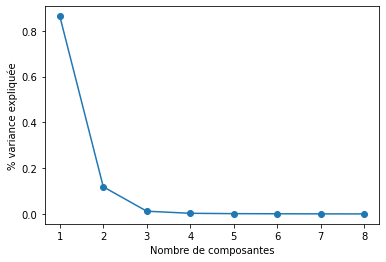

In [ ]:
import matplotlib.pyplot as plt

var_component=Rio_pca.explained_variance_ratio_
seuil_Kayser=var_component.mean()
plt.plot(range(1,len(var_component)+1),list(var_component), '-o')
plt.xlabel('Nombre de composantes')
plt.ylabel('% variance expliquée')

<ipython-input-29-5f8d8c2558ae>:6: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



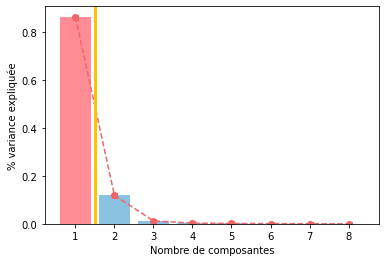

In [ ]:
#Methode Kayser
import numpy as np
var_component=Rio_pca.explained_variance_ratio_
seuil_Kayser=var_component.mean()
color_list=["#FF8B94","#8AC0E0","#9EDB9B","#CF9FD5","#FFC100"]
color_vec=[color_list[var<seuil_Kayser] for var in var_component]
plt.bar(np.linspace(start = 1,stop =8, num=8),list(var_component),color=color_vec)
plt.plot(np.linspace(start = 1,stop =8, num=8),list(var_component),'-o',color="#EF6669",linestyle='--')
plt.plot(np.linspace(start = 1,stop =8, num=8),list(var_component), color="#EF6669",linestyle='None',marker='s',markersize =5)
plt.axvline(x=sum(var_component>seuil_Kayser)+.5,color="#FFC100",ymin=0, ymax =1, linewidth=3)
plt.xlabel('Nombre de composantes')
plt.ylabel('% variance expliquée')
plt.show()

In [ ]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(Rio_modele_dumm)
reduced_features[0:1]

array([[-12.46241048,  -5.41848278]])

In [ ]:
reduced_features

array([[-12.46241048,  -5.41848278],
       [  8.47940427,  -3.87974236],
       [-12.46491653,  -5.42815037],
       ...,
       [ 52.73916865,  -5.8881867 ],
       [-12.4514698 ,  -5.69518239],
       [  4.45213244,  -1.35722184]])

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
clusters= km.fit(reduced_features)

In [ ]:
clusters.inertia_

2585197.3453918975

In [ ]:
clusters.labels_

array([0, 1, 0, ..., 2, 0, 1], dtype=int32)

In [ ]:
test_sklearn = KMeans(n_clusters=4)
test_sklearn.fit(reduced_features)
test_sklearn.inertia_

2585197.3453918975

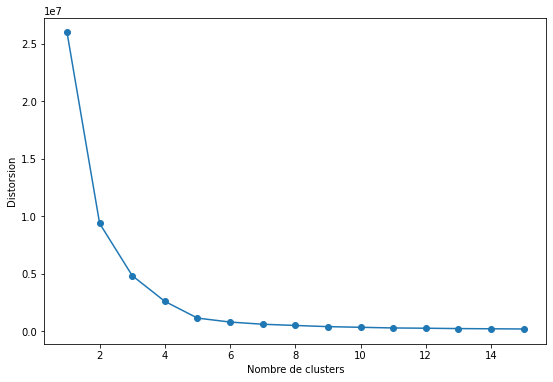

In [ ]:
cluster_distorsion = []
for i in range(1, 16):
    test_sklearn = KMeans(n_clusters=i)
    test_sklearn.fit(reduced_features)
    cluster_distorsion.append(test_sklearn.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(np.linspace(start = 1,stop =15, num=15),cluster_distorsion, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Distorsion")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
clusters= km.fit(Rio_modele_dumm)
color_list=["#FF8B94","#00B0F0","#94B4CA","#44546A"]
color_vec=[color_list[label] for label in clusters.labels_]

In [ ]:
df=pd.DataFrame({'comp1':reduced_features[:,0],'comp2':reduced_features[:,1],'cluster':clusters.labels_})

In [ ]:
km

KMeans(n_clusters=4)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



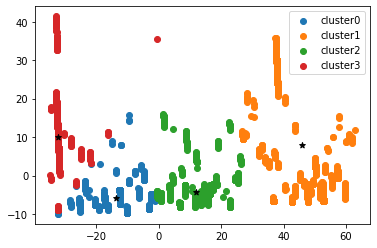

In [ ]:
plt.figure()
center_KM_cluster=reduction_pca.transform(km.cluster_centers_)

for num_clust in range(0,4):
    df_cluster=df[df.cluster==num_clust]
    plt.scatter(df_cluster.comp1,df_cluster.comp2, label='cluster'+str(num_clust))
    plt.scatter(center_KM_cluster[num_clust][0],center_KM_cluster[num_clust][1], marker='*',color="black")
plt.legend()

In [ ]:
rio_index.head()

accommodates  bedrooms  bathrooms  beds  distance_christ  \
0             5       2.0        1.0   2.0         3.716563   
1             2       1.0        1.0   1.0         3.840575   
2             3       1.0        1.0   2.0         3.530774   
3             3       1.0        1.0   2.0         3.407779   
4             3       1.0        1.5   2.0         4.400025   

   distance_maracana  neighbourhood_index  room_type_index  
0           7.703303                   22                0  
1           8.455008                   43                0  
2           8.052876                   22                0  
3           7.851365                   43                0  
4           9.014703                   43                0

# Unsupervised model

In [ ]:
from sklearn.preprocessing import LabelEncoder
model_variable_quantitative =['accommodates', 'bedrooms', 'bathrooms', 'beds', 'distance_christ', 'distance_maracana']
Rio_modele_dumm=rio_index_t.copy()

for col in model_variable_quantitative:
    Rio_modele_dumm.loc[:,col]=Rio_modele_dumm.loc[:,col].astype(float)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Rio_modele_dumm.loc[:, Rio_modele_dumm.columns != "target"], Rio_modele_dumm.target, test_size = 0.3, random_state=555)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
model_LogReg= classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
model_RF= classifier.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
model_GBT= classifier.fit(X_train, y_train)

from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
model_ETC = classifier.fit(X_train, y_train)

print("Logistic reg \tTrain : {0:f} \t Test {1:f}".format(model_LogReg.score(X_train, y_train),model_LogReg.score(X_test, y_test)))
print("Random Forest \tTrain : {0:f} \t Test {1:f}".format(model_RF.score(X_train, y_train),model_RF.score(X_test, y_test)))
print("GBT \tTrain : {0:f} \t Test {1:f}".format(model_GBT.score(X_train, y_train),model_GBT.score(X_test, y_test)))
print("ETC \tTrain : {0:f} \t Test {1:f}".format(model_ETC.score(X_train, y_train),model_ETC.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic reg 	Train : 0.488816 	 Test 0.493246
Random Forest 	Train : 1.000000 	 Test 0.462751
GBT 	Train : 0.529430 	 Test 0.506959
ETC 	Train : 1.000000 	 Test 0.446889


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, accuracy_score, matthews_corrcoef, precision_score, recall_score, fbeta_score, cohen_kappa_score
def calcul_metrique_fct(list_models,list_metrics,y_test=y_test,y_train=y_train,X_test=X_test,X_train=X_train):
    for model in list_models:
        print(str(model).split('(')[0])
        for metric in list_metrics:
            name_metric=str(metric).split(' ')[1]
            if name_metric in ['roc_auc_score','brier_score_loss']:
                perf_train=metric(y_train,[pr[1] for pr in model.predict_proba(X_train)])
                perf_test=metric(y_test,[pr[1] for pr in model.predict_proba(X_test)])
                print("\t{0:s} Train : {1:f} \t Test {2:f}".format(name_metric,perf_train,perf_test))
            else:
                perf_train=metric(y_true=y_train,y_pred=model.predict(X_train))
                perf_test=metric(y_true=y_test,y_pred=model.predict(X_test))
                print("\t{0:s} Train : {1:f} \t Test {2:f}".format(name_metric,perf_train,perf_test))


calcul_metrique_fct([model_LogReg,model_RF,model_GBT,model_ETC], list_metrics=[accuracy_score])

LogisticRegression
	accuracy_score Train : 0.488816 	 Test 0.493246
RandomForestClassifier
	accuracy_score Train : 1.000000 	 Test 0.462751
GradientBoostingClassifier
	accuracy_score Train : 0.529430 	 Test 0.506959
ExtraTreesClassifier
	accuracy_score Train : 1.000000 	 Test 0.446889


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier

random_seed=555

RF = {
'model' : RandomForestClassifier(),
'parameters' : {'n_estimators' : [20, 50,100],
                'max_depth' : [5, 7],
                'random_state' : [random_seed],
                'class_weight':[None, 'balanced']
                }
}


XGB = {
'model' : XGBClassifier(),
'parameters' : {'n_estimators' : [20, 50],
                 'max_depth' : [5, 7],
                 'learning_rate' : [1e-1, 1e-2, 1e-3, 1e-4],
                 'seed' : [random_seed]
                }
}

ExtraTrees = {
'model' : ExtraTreesClassifier(),
'parameters' : {'n_estimators' : [20, 50,100],
                'max_depth' : [5, 7],
                'random_state' : [random_seed],
                'class_weight':[None, 'balanced'],
                'bootstrap': [True, False],
                'max_features': ['auto', 'sqrt','log2' ]
                }
}

Models_list = [RF, XGB, ExtraTrees]


from sklearn.metrics import make_scorer, roc_auc_score, brier_score_loss, average_precision_score, f1_score, accuracy_score, matthews_corrcoef, precision_score, recall_score, fbeta_score, cohen_kappa_score
from sklearn.model_selection import GridSearchCV
scorer =  make_scorer(accuracy_score)#make_scorer(f1_score, labels='binary')
res={}
for model_class in Models_list:
    print(str(model_class['model']).split('(')[0])
    model_opt=GridSearchCV(estimator=model_class['model'],param_grid=model_class['parameters'], cv=10, scoring =scorer, return_train_score=True).fit(X_train, y_train)
    res.update({str(model_class['model']).split('(')[0] : model_opt.cv_results_})
    #print(model_opt.best_params_,'\n\n')

RandomForestClassifier
XGBClassifier
ExtraTreesClassifier


In [ ]:
df_res=pd.DataFrame({'algo':[],'mean_train_score': [],'std_train_score': [],'mean_test_score': [], 'std_test_score':[],'params':[]})
for algo in list(res):
    model_opt=res[algo]
    df=pd.DataFrame({'algo':algo,'mean_train_score':model_opt['mean_train_score'],'std_train_score':model_opt['std_train_score'], 'mean_test_score':model_opt['mean_test_score'],'std_test_score':model_opt['std_test_score'],'params':model_opt['params']}, )
    df_res = pd.concat([df_res, df],ignore_index=True)



index_best=df_res.sort_values(['mean_test_score','std_test_score','mean_train_score','std_train_score'], ascending=[False,True,False,True]).index[0]


#Affichage meilleur algo + paramètres
print(df_res.algo[index_best])
df_res.loc[index_best,'params']

XGBClassifier


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'seed': 555}

In [ ]:
df_res.sort_values(['mean_test_score','std_test_score','mean_train_score','std_train_score'], ascending=[False,True,False,True])


algo  mean_train_score  std_train_score  \
15           XGBClassifier          0.584581         0.002150   
5   RandomForestClassifier          0.522076         0.001582   
13           XGBClassifier          0.534123         0.001766   
4   RandomForestClassifier          0.522027         0.000859   
3   RandomForestClassifier          0.521228         0.001397   
..                     ...               ...              ...   
87    ExtraTreesClassifier          0.459108         0.001067   
82    ExtraTreesClassifier          0.455736         0.002496   
85    ExtraTreesClassifier          0.455736         0.002496   
46    ExtraTreesClassifier          0.454386         0.004123   
49    ExtraTreesClassifier          0.454386         0.004123   

    mean_test_score  std_test_score  \
15         0.501491        0.008432   
5          0.501404        0.010314   
13         0.500877        0.010061   
4          0.500219        0.010532   
3          0.499518        0.010470   
..              ...             ...   
87         0.457588        0.009397   
82         0.453202        0.010998   
85         0.453202        0.010998   
46         0.453202        0.011632   
49         0.453202        0.011632   

                                               params  
15  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...  
5   {'class_weight': None, 'max_depth': 7, 'n_esti...  
13  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  
4   {'class_weight': None, 'max_depth': 7, 'n_esti...  
3   {'class_weight': None, 'max_depth': 7, 'n_esti...  
..                                                ...  
87  {'bootstrap': False, 'class_weight': 'balanced...  
82  {'bootstrap': False, 'class_weight': 'balanced...  
85  {'bootstrap': False, 'class_weight': 'balanced...  
46  {'bootstrap': True, 'class_weight': 'balanced'...  
49  {'bootstrap': True, 'class_weight': 'balanced'...  

[100 rows x 6 columns]

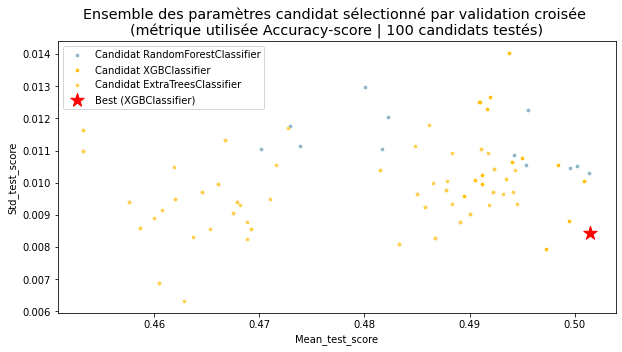

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
color_list = ["#8CB4CA", "#FFC000", "#FFD050", "#FF8B94"]
for cand_algo,col in zip(df_res['algo'].unique().tolist(),color_list):
    plt.scatter(df_res[df_res["algo"]==cand_algo]['mean_test_score'],df_res[df_res["algo"]==cand_algo]['std_test_score'], color=col, s=7, label=cand_algo)

#Best candidate
plt.scatter(df_res.loc[index_best,'mean_test_score'],df_res.loc[index_best,'std_test_score'], color='red',marker='p', s=200, label="Best ("+str(df_res.loc[index_best]["algo"])+')')
ax.set_xlabel('Mean_test_score')
ax.set_ylabel('Std_test_score')
plt.title('Ensemble des paramètres candidat sélectionné par validation croisée \n(métrique utilisée '+'Accuracy'+'-score | '+str(df_res.shape[0])+' candidats testés)', size = 'x-large')
plt.legend()

In [ ]:
model=XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 50, seed= 555)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5080843225542366

# Analysis on airbnb titles (predict price with title)

In [ ]:
def tokenizer(texte):
  spl = texte.lower().split(" ")
  i=0
  res = []
  for e in spl:
    for j in [',','&','-',':','!','?','.','...','’','(',')']:
      e = e.replace(j, "")
      spl[i] = e
    i = i+1
  for m in spl:
    if m != '':
      res.append(m)
  return res


In [ ]:
import nltk
from nltk.corpus import *
nltk.download('stopwords')
sw = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from collections import Counter

Rio_titre = Rio[['name', 'class_price']]
Rio_titre = Rio_titre.groupby(['class_price'])['name'].apply(' '.join).reset_index()

Rio_titre0 = Rio_titre[Rio_titre["class_price"] == "Class 0"]
Rio_titre1 = Rio_titre[Rio_titre["class_price"] == "Class 1"]
Rio_titre2 = Rio_titre[Rio_titre["class_price"] == "Class 2"]
Rio_titre3 = Rio_titre[Rio_titre["class_price"] == "Class 3"]

name0 = Rio_titre0["name"].apply(tokenizer)
name1 = Rio_titre1["name"].apply(tokenizer)
name2 = Rio_titre2["name"].apply(tokenizer)
name3 = Rio_titre3["name"].apply(tokenizer)

name0 = list(name0)[0]
name1 = list(name1)[0]
name2 = list(name2)[0]
name3 = list(name3)[0]

In [ ]:
for i in range(len(name0)):
  if name0[i] in sw:
    name0[i] = ""
  if len(name0[i]) <4:
    name0[i] = ""

name0_ = []

for e in name0:
  if e != '':
    name0_.append(e)

for i in range(len(name1)):
  if name1[i] in sw:
    name1[i] = ""
  if len(name1[i]) <4:
    name1[i] = ""

name1_ = []

for e in name1:
  if e != '':
    name1_.append(e)

for i in range(len(name2)):
  if name2[i] in sw:
    name2[i] = ""
  if len(name2[i]) <4:
    name2[i] = ""

name2_ = []

for e in name2:
  if e != '':
    name2_.append(e)

for i in range(len(name3)):
  if name3[i] in sw:
    name3[i] = ""
  if len(name3[i]) <4:
    name3[i] = ""

name3_ = []

for e in name3:
  if e != '':
    name3_.append(e)

In [ ]:
print(Counter(name0_).most_common(5))
print(Counter(name1_).most_common(5))
print(Counter(name2_).most_common(5))
print(Counter(name3_).most_common(5))

[('quarto', 1604), ('copacabana', 907), ('room', 763), ('apartamento', 420), ('praia', 377)]
[('copacabana', 2219), ('apartamento', 1228), ('quarto', 1105), ('praia', 945), ('ipanema', 877)]
[('copacabana', 1574), ('apartamento', 1495), ('apartment', 1051), ('ipanema', 1039), ('barra', 860)]
[('apartamento', 1005), ('barra', 746), ('apartment', 737), ('copacabana', 676), ('ipanema', 542)]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

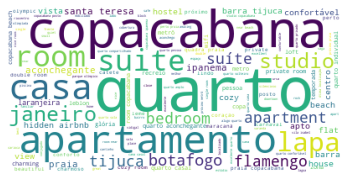

In [ ]:
wordcloud = WordCloud(background_color="white").generate(' '.join(name0_))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

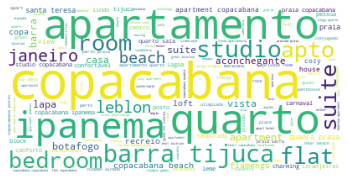

In [ ]:
wordcloud = WordCloud(background_color="white").generate(' '.join(name1_))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

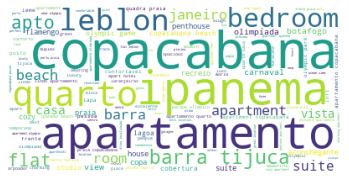

In [ ]:
wordcloud = WordCloud(background_color="white").generate(' '.join(name2_))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

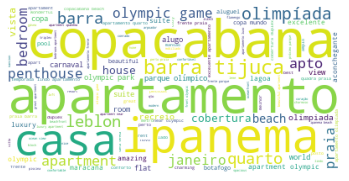

In [ ]:
wordcloud = WordCloud(background_color="white").generate(' '.join(name3_))
plt.imshow(wordcloud)
plt.axis("off")

Useless..

# Best model interpretability with Shap library

In [ ]:
pip install shap

In [ ]:
X_test = X_test[["room_type_index", "neighbourhood_index", "accommodates", "bedrooms", "bathrooms", "beds", "distance_christ", "distance_maracana"]]
X_test.head()

room_type_index  neighbourhood_index  accommodates  bedrooms  \
23779                0                   50          14.0       6.0   
25400                2                   74           1.0       1.0   
29440                1                   87           1.0       2.0   
22869                1                   82           3.0       1.0   
5896                 0                   82           4.0       1.0   

       bathrooms  beds  distance_christ  distance_maracana  
23779        8.0   6.0         2.464965           3.906715  
25400        1.0   1.0        23.892332          23.726240  
29440        2.0   1.0         3.910929           2.389124  
22869        1.0   1.0         4.820032           4.901487  
5896         1.0   2.0         4.872518           4.594082

In [ ]:
import shap
#Load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [ ]:
index = X_test.index.to_list()

In [ ]:
X_display = Rio_modele_.drop(['class_price'], axis=1)
X_display.head()

room_type neighbourhood  accommodates  bedrooms  bathrooms  beds  \
0  Entire home/apt    Copacabana             5       2.0        1.0   2.0   
1  Entire home/apt       Ipanema             2       1.0        1.0   1.0   
2  Entire home/apt    Copacabana             3       1.0        1.0   2.0   
3  Entire home/apt       Ipanema             3       1.0        1.0   2.0   
4  Entire home/apt       Ipanema             3       1.0        1.5   2.0   

   distance_christ  distance_maracana  
0         3.716563           7.703303  
1         3.840575           8.455008  
2         3.530774           8.052876  
3         3.407779           7.851365  
4         4.400025           9.014703

In [ ]:
X_test_display = X_display.iloc[index,:]

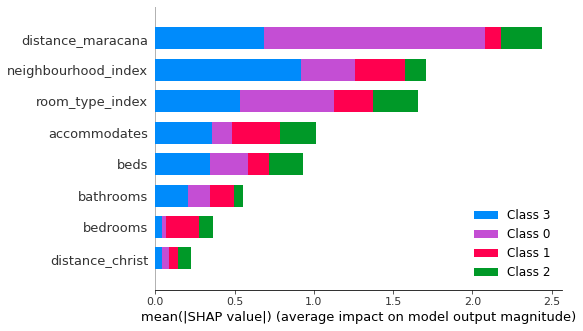

In [ ]:
shap.summary_plot(shap_values, X_test)

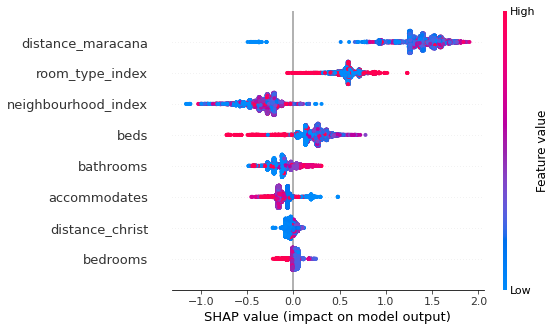

In [ ]:
shap.summary_plot(shap_values[0], X_test)

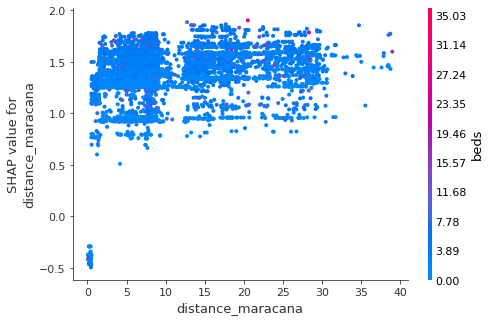

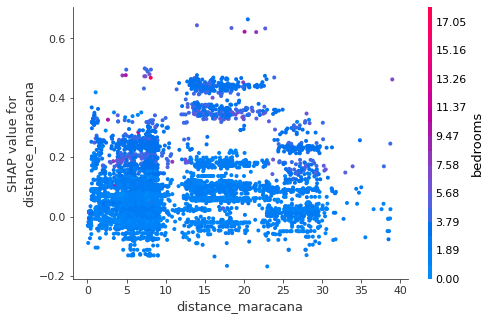

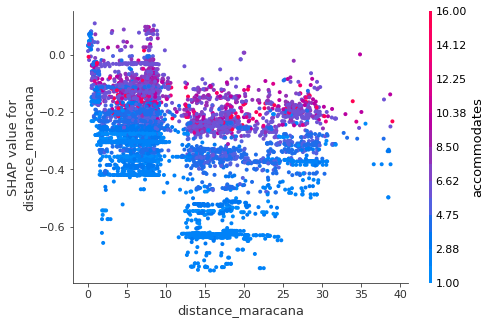

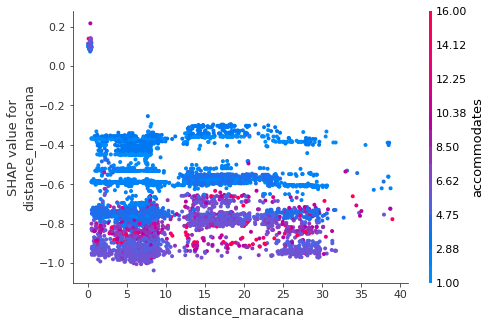

In [ ]:
for i in range(4):
  shap.dependence_plot("distance_maracana", shap_values[i], X_test, display_features=X_test_display)

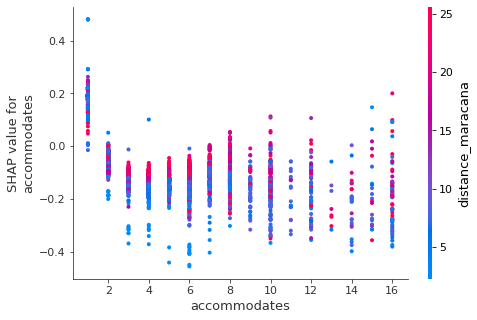

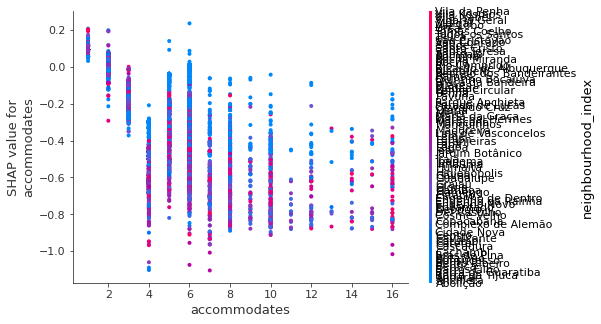

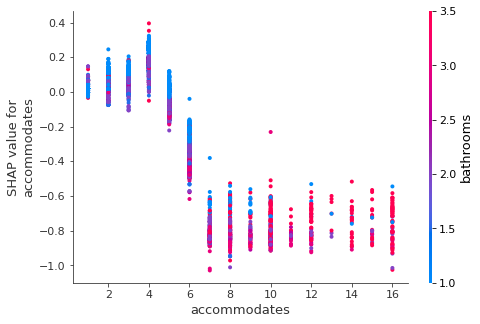

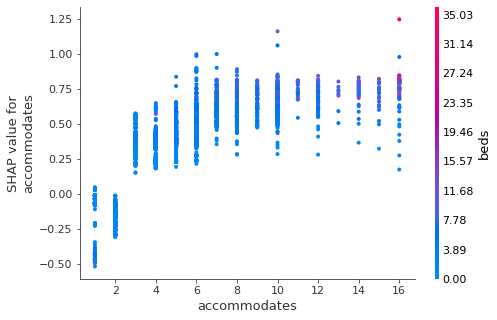

In [ ]:
for i in range(4):
  shap.dependence_plot("accommodates", shap_values[i], X_test, display_features=X_test_display)

In [ ]:
explainer.expected_value

[0.14023232, 0.7458794, 0.73057294, 0.2511787]

In [ ]:
rio_index_t[rio_index_t["target"] == 1].count()

accommodates           6671
bedrooms               6671
bathrooms              6671
beds                   6671
distance_christ        6671
distance_maracana      6671
neighbourhood_index    6671
room_type_index        6671
target                 6671
dtype: int64

In [ ]:
np.exp(explainer.expected_value[0])/(np.exp(explainer.expected_value[0])+np.exp(explainer.expected_value[1])+np.exp(explainer.expected_value[2])+np.exp(explainer.expected_value[3]))

0.1737808

In [ ]:
np.exp(explainer.expected_value[1])/(np.exp(explainer.expected_value[0])+np.exp(explainer.expected_value[1])+np.exp(explainer.expected_value[2])+np.exp(explainer.expected_value[3]))

0.31844246

In [ ]:
np.exp(explainer.expected_value[2])/(np.exp(explainer.expected_value[0])+np.exp(explainer.expected_value[1])+np.exp(explainer.expected_value[2])+np.exp(explainer.expected_value[3]))

0.31360534

In [ ]:
np.exp(explainer.expected_value[3])/(np.exp(explainer.expected_value[0])+np.exp(explainer.expected_value[1])+np.exp(explainer.expected_value[2])+np.exp(explainer.expected_value[3]))

0.19417135

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][66,:], X_test_display.iloc[66,:])

In [ ]:
np.exp(2.40)/(np.exp(0.32)+np.exp(-0.20)+np.exp(-0.09)+np.exp(2.40))

0.7799619921005888

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][66,:], X_test_display.iloc[66,:])

In [ ]:
np.exp(0.32)/(np.exp(0.32)+np.exp(-0.20)+np.exp(-0.09)+np.exp(2.40))

0.09744081717995563

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[2], shap_values[2][66,:], X_test_display.iloc[66,:])

In [ ]:
np.exp(-0.20)/(np.exp(0.32)+np.exp(-0.20)+np.exp(-0.09)+np.exp(2.40))

0.057930568024490744

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[3], shap_values[3][66,:], X_test_display.iloc[66,:])

In [ ]:
np.exp(-0.09)/(np.exp(0.32)+np.exp(-0.20)+np.exp(-0.09)+np.exp(2.40))

0.06466662269496491

In [ ]:
X_test_display.iloc[66,] # Pour trouver l'index d'origine (var name)

room_type               Private room
neighbourhood        Barra da Tijuca
accommodates                       3
bedrooms                         1.0
bathrooms                        3.0
beds                             2.0
distance_christ            15.258985
distance_maracana          16.134081
Name: 1901, dtype: object

In [ ]:
Rio_modele.iloc[1901,]

id                                               2101665
host_id                                          7955669
room_type                                   Private room
neighbourhood                            Barra da Tijuca
accommodates                                           3
bedrooms                                             1.0
bathrooms                                            3.0
beds                                                 2.0
price                                              110.0
name                 quarto confortável  barra da tijuca
latitude                                      -23.006641
longitude                                     -43.348852
class_price                                      Class 0
distance_christ                                15.258985
distance_maracana                              16.134081
Name: 1901, dtype: object

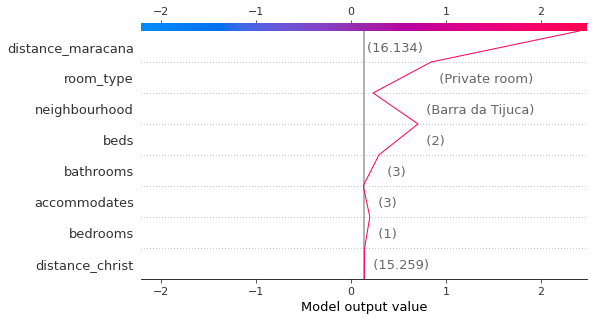

In [ ]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], shap_values[0][66,:], X_test_display.iloc[66,:])